<a href="https://colab.research.google.com/github/amutharun/GenAIWorkshop/blob/main/Prompt_Engineering_with_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Engineering

This notebook contains examples and exercises to learning about prompt engineering.

We will be using the [OpenAI APIs](https://platform.openai.com/) for all examples.

Below we are loading the necessary libraries, utilities, and configurations.

In [ ]:
%%capture
# update or install the necessary libraries
!pip install --upgrade openai
!pip install --upgrade langchain

In [113]:
import openai
import os
import IPython
from langchain.llms import OpenAI

Load environment variables. You can use anything you like but I used `python-dotenv`. Just create a `.env` file with your `OPENAI_API_KEY` then load it.

In [135]:
!pip install --upgrade python-dotenv
import os
from dotenv import load_dotenv
load_dotenv()

# API configuration
openai.api_key = os.getenv("OPENAI_API_KEY")

# for LangChain
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["SERPAPI_API_KEY"] = os.getenv("SERPER_API_KEY")

In [ ]:
def set_open_params(
    model="text-davinci-003",
    chat_model="gpt-4",
    temperature=0.7,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
):
    """ set openai parameters"""

    openai_params = {}

    openai_params['model'] = model
    openai_params['chat_model'] = chat_model
    openai_params['temperature'] = temperature
    openai_params['max_tokens'] = max_tokens
    openai_params['top_p'] = top_p
    openai_params['frequency_penalty'] = frequency_penalty
    openai_params['presence_penalty'] = presence_penalty
    return openai_params

def get_completion(params, prompt):
    """ GET completion from openai api"""

    response = openai.Completion.create(
        engine = params['model'],
        prompt = prompt,
        temperature = params['temperature'],
        max_tokens = params['max_tokens'],
        top_p = params['top_p'],
        frequency_penalty = params['frequency_penalty'],
        presence_penalty = params['presence_penalty'],
    )
    return response

def get_chat_completion(params, prompt):
    """ GET completion from openai api"""

    response = openai.ChatCompletion.create(
        engine = params['chat_model'],
        prompt = prompt,
        temperature = params['temperature'],
        max_tokens = params['max_tokens'],
        top_p = params['top_p'],
        frequency_penalty = params['frequency_penalty'],
        presence_penalty = params['presence_penalty'],
    )
    return response

Basic prompt example:

In [ ]:
# basic example
params = set_open_params()

prompt = "The sky is"

response = get_completion(params, prompt)

In [ ]:
response.choices[0].text

' blue\n\nThe sky is blue during the day. During the night, the sky can look black or a deep shade of blue or purple, depending on the presence of stars and other celestial bodies.'

Let's beautify the display of responses

In [ ]:
IPython.display.Markdown(response.choices[0].text)

 blue

The sky is blue during the day. During the night, the sky can look black or a deep shade of blue or purple, depending on the presence of stars and other celestial bodies.

Try with different temperature to compare results:

In [ ]:
params = set_open_params(temperature=0)
prompt = "The sky is"
response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 blue

The sky is blue because of the way the atmosphere scatters sunlight. When sunlight passes through the atmosphere, the blue wavelengths are scattered more than the other colors, making the sky appear blue.

### 1.1 Text Summarization

In [ ]:
params = set_open_params(temperature=0.7)
prompt = """Antibiotics are a type of medication used to treat bacterial infections.
They work by either killing the bacteria or preventing them from reproducing, allowing the body's immune system to fight off the infection.
Antibiotics are usually taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered intravenously.
They are not effective against viral infections, and using them inappropriately can lead to antibiotic resistance.

Explain the above in one sentence:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)


Antibiotics are medications used to treat bacterial infections by either killing the bacteria or preventing them from reproducing, but are not effective against viral infections and can cause antibiotic resistance if misused.

Exercise: Instruct the model to explain the paragraph in one sentence like "I am 5". Do you see any differences?

In [ ]:
params = set_open_params(temperature=0.7)
prompt = """Antibiotics are a type of medication used to treat bacterial infections.
They work by either killing the bacteria or preventing them from reproducing, allowing the body's immune system to fight off the infection.
Antibiotics are usually taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered intravenously.
They are not effective against viral infections, and using them inappropriately can lead to antibiotic resistance.

Explain the above like I'm 5:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)



Antibiotics are special medicines that doctors give to help fight off bad bacteria that makes people sick. They work by either killing the bad bacteria or stopping it from making more of itself, which lets the body's own defenses take care of the infection. Antibiotics come in different forms like pills, capsules, or liquids, and you can take them by mouth or get them through a tube in your arm. They don't work on illnesses caused by viruses, and if you use them when you don't need them, the bad bacteria can get stronger and harder to treat.

### 1.2 Question Answering

In [ ]:
prompt = """
Answer the question based on the context below. Keep the answer short and concise.
Respond "Unsure about answer" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical.
There, scientists generated an early version of the antibody, dubbed OKT3.
Originally sourced from mice, the molecule was able to bind to the surface of T cells and limit their cell-killing potential.
In 1986, it was approved to help prevent organ rejection after kidney transplants, making it the first therapeutic antibody allowed for human use.

Question: What was OKT3 originally sourced from?

Answer:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)


 Snake.

Context obtained from here: https://www.nature.com/articles/d41586-023-00400-x

Exercise: Edit prompt and get the model to respond that it isn't sure about the answer.

### 1.3 Text Classification

In [ ]:
prompt = """Classify the text into neutral, negative or positive.

Text: I think the food was okay.

Sentiment:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 Neutral

Exercise: Modify the prompt to instruct the model to provide an explanation to the answer selected.

### 1.4 Role Playing

In [ ]:
prompt = """The following is a conversation with an AI research assistant. The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greeting! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 Sure! A black hole is created when a massive star runs out of fuel and can no longer support itself against its own gravity. The result is a collapse of the star, leading to the formation of a black hole. The mass of the star is compressed into a single point, resulting in a region of space-time from which not even light can escape. This is known as an event horizon.

Exercise: Modify the prompt to instruct the model to keep AI responses concise and short.

### 1.5 Code Generation

In [ ]:
prompt = "\"\"\"\nTable departments, columns = [DepartmentId, DepartmentName]\nTable students, columns = [DepartmentId, StudentId, StudentName]\nCreate a MySQL query for all students in the Computer Science Department\n\"\"\""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)



SELECT StudentId, StudentName 
FROM students
WHERE DepartmentId = (SELECT DepartmentId FROM departments WHERE DepartmentName = 'Computer Science');

### 1.6 Reasoning

In [ ]:
prompt = """Say True or False. The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)



False

In [ ]:
prompt = """Say True or False. The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1

Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even. Finally say True or False"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

.

Odd numbers: 15, 5, 3, 13, 7, 1 
Sum of odd numbers: 44 
True (44 is an even number)

Exercise: Improve the prompt to have a better structure and output format.

## 2. Advanced Prompting Techniques

Objectives:

- Cover more advanced techniques for prompting: few-shot, chain-of-thoughts,...

### 2.2 Few-shot prompts

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
A:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 The answer is True.

### 2.3 Chain-of-Thought (CoT) Prompting

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
A:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 Adding all the odd numbers (15, 5, 13, 7, 1) gives 41. The answer is False.

### 2.4 Zero-shot CoT

In [ ]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. How many apples did I remain with?

Let's think step by step."""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 

Initially, you bought 10 apples. 

You gave away 4 apples, so you are left with 6 apples. 

You bought 5 more, so you now have 11 apples. 

You ate 1 apple, leaving you with 10 apples.

See what happens if we do not add that one magical line "Let's this step by step"
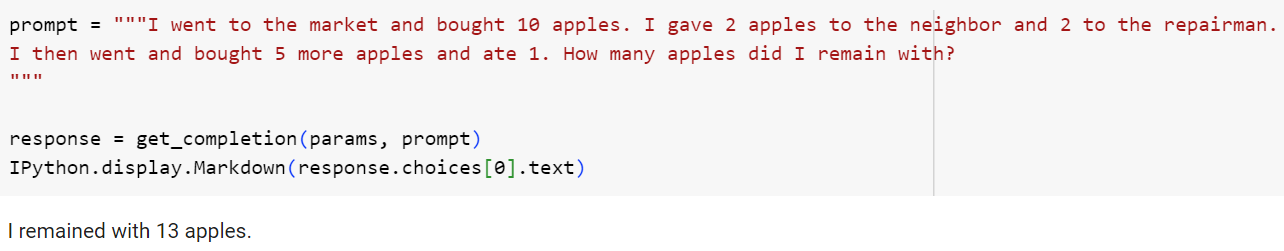

### 2.5 Generate Knowledge Prompting

As an exercise, check examples in our [guide](https://github.com/dair-ai/Prompt-Engineering-Guide/blob/main/guides/prompts-advanced-usage.md#generated-knowledge-prompting) and try them here.

LLMs continue to be improved and one popular technique includes the ability to incorporate knowledge or information to help the model make more accurate predictions.

Using a similar idea, can the model also be used to generate knowledge before making a prediction? That's what is attempted in the [paper](https://arxiv.org/pdf/2110.08387.pdf) by Liu et al. 2022
generate knowledge to be used as part of the prompt. In particular, how helpful is this for tasks such as commonsense reasoning?

Let's try a simple prompt:

In [ ]:
prompt = """Part of golf is trying to get a higher point total than others. Yes or No?"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)



Yes.

haha...😆  This type of mistake reveals the limitations of LLMs to perform tasks that require more knowledge about the world. How do we improve this with knowledge generation?

First, we generate a few "knowledges":

In [ ]:
prompt = """Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 In golf, the goal is to complete the course in the fewest number of strokes. The total number of strokes taken is a player’s score. The lower the score, the better. Players compete against each other or the course by trying to get a lower score than their opponents or the course par, which is the expected number of strokes for a given hole.

Much better. isn't it ? 😀

Let's run it again to see if we get more knowledge

In [ ]:
prompt = """Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:"""

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 The game of golf is played by trying to hit a ball into a hole using various types of clubs in the fewest number of strokes. The winner of a golf match is the player with the lowest total strokes at the end of the game.

We are using the prompt provided in the paper by Liu et al. 2022.

The next step is to integrate the knowledge and get a prediction. I reformatted the question into QA format to guide the answer format.

In [ ]:
prompt = """Question: Part of golf is trying to get a higher point total than others. Yes or No?

Knowledge: The objective of golf is to play a set of holes in the least number of strokes. A round of golf typically consists of 18 holes. Each hole is played once in the round on a standard golf course. Each stroke is counted as one point, and the total number of strokes is used to determine the winner of the game.

Explain and Answer: """

response = get_completion(params, prompt)
IPython.display.Markdown(response.choices[0].text)

 No, the objective of golf is to play a set of holes in the least number of strokes. Points are not used to determine the winner of the game.

In [83]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model="gpt-3.5-turbo",max_tokens=500)

prompt = """Question: Part of golf is trying to get a higher point total than others. Yes or No?

Knowledge: The objective of golf is to play a set of holes in the least number of strokes. A round of golf typically consists of 18 holes. Each hole is played once in the round on a standard golf course. Each stroke is counted as one point, and the total number of strokes is used to determine the winner of the game.

Explain and Answer: """

IPython.display.Markdown(llm.invoke(prompt).content)

No, the objective of golf is not to get a higher point total than others. In fact, the objective is quite the opposite. The goal in golf is to complete each hole in as few strokes as possible. Each stroke is counted as one point, but the aim is to have the lowest total number of strokes at the end of the round. The player with the fewest strokes is typically considered the winner of the game. So, in golf, the objective is to have a lower point total than others, not a higher one.

For further details, check out the paper https://arxiv.org/pdf/2110.08387.pdf

### **2.6 Chain of Density**

We all know LLM’s can summarise things and we know we can control summary length, topics covered, and style, however, an important but overlooked aspect is information density – (how much detail to include within a constrained length). The ideal goal is a summary that is informative yet clear. Striking this balance can be challenging, that’s where a new technique called Chain of Density (CoD) prompting comes in! It aims to help address this tradeoff.

* Chain of Density (CoD) is a novel prompt engineering technique designed for optimizing summarization tasks in Large Language Models like GPT-4
* The technique deals with controlling the information density in the generated summary, providing a balanced output that is neither too sparse nor too dense
* CoD has practical implications for data science, especially in tasks that require high-quality, contextually appropriate summarizations

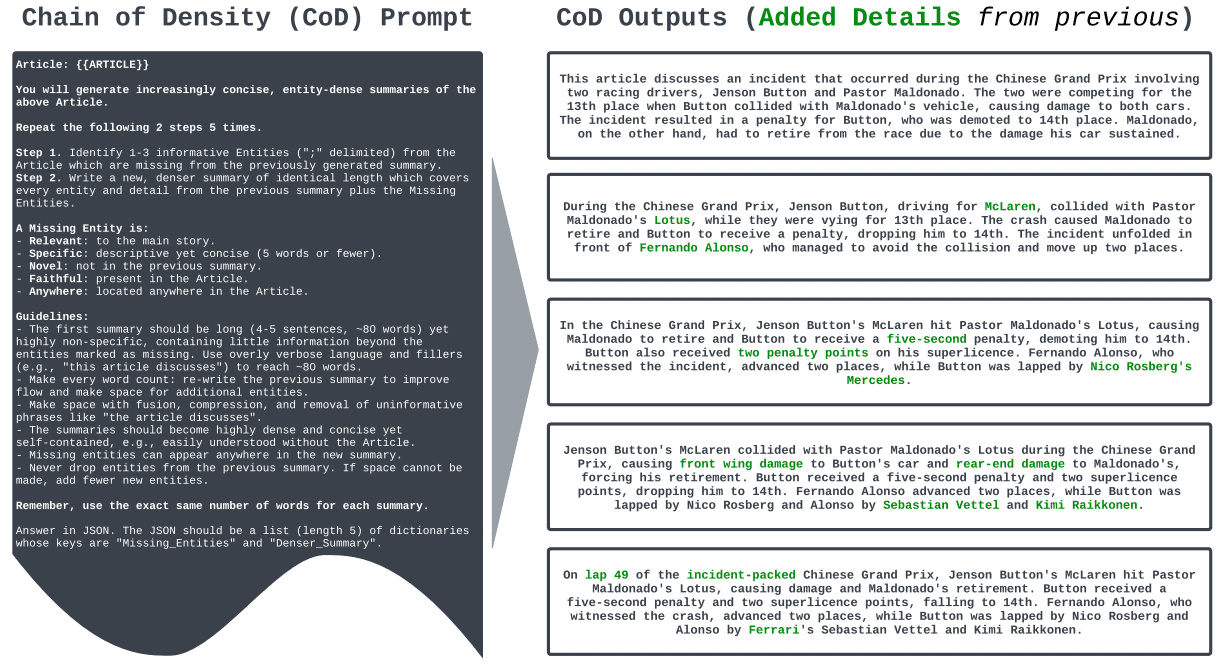

Source, from the original paper [From Sparse to Dense: GPT-4 Summarization with Chain of Density Prompting](https://arxiv.org/abs/2309.04269)  

In [84]:
prompt = """Article:

{{ In the wake of President Biden's executive order on Monday, AI companies and industry leaders have weighed in on this watershed moment in AI regulation. But the biggest player in the AI space, OpenAI, has been conspicuously quiet.

The Biden-Harris administration's far-ranging executive order addressing the risks of AI builds upon voluntary commitments secured by 15 leading AI companies. OpenAI was among the first batch of companies to promise the White House safe, secure, and trustworthy development of its AI tools. Yet the company hasn't issued any statement on its website or X (formerly known as Twitter). CEO Sam Altman, who regularly shares OpenAI news on X, hasn't posted anything either.

OpenAI has not responded to Mashable's request for comment.

SEE ALSO: White House announces new AI initiatives at Global Summit on AI Safety
Of the 15 companies that made a voluntary commitment to the Biden Administration, the following have made public statements, and all of which expressed support for the executive order: Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, and Scale AI. Nvidia decline to comment.

In addition to crickets from OpenAI, Mashable has yet to hear from Cohere, Inflection, Meta, Palantir, and Stability AI. But OpenAI and Altman's publicity tour proclaiming the urgent risks of AI and the need for regulation makes the company's silence all the more noticeable.



Altman has been vocal about the threat that generative AI made by his own company poses. In May, Altman, along with technology pioneers Geoffrey Hinton and Bill Gates signed an open letter, stating, "Mitigating the risk of extinction from AI should be a global priority alongside other societal-scale risks such as pandemics and nuclear war."

At a senate hearing in May, Altman expressed the need for AI regulation: "I think if this technology goes wrong, it can go quite wrong, and we want to be vocal about that," said Altman in response to inquiry from Sen. Blumenthal, D-CT about the threat of superhuman machine intelligence.


So far, cooperation with lawmakers and world leaders has worked in OpenAI's favor. Altman participated in the Senate's bipartisan closed-door AI summit, giving OpenAI a seat at the table for formulating AI legislation. Shortly after Altman's testimony, leaked documents from OpenAI showed the company lobbying for weaker regulation in the European Union.

It's unclear where OpenAI stands on the executive order, but open-source advocates say the company already has too much lobbying influence. On Wednesday, the same day as the AI Safety Summit in the U.K., more than 70 AI leaders issued a joint statement calling for a more transparent approach to AI regulation. "The idea that tight and proprietary control of foundational AI models is the only path to protecting us from society-scale harm is naive at best, dangerous at worst," said the statement.

Meta Chief AI Scientist Yann LeCun, one of the signatories, doubled down on this sentiment on X (formerly known as Twitter) by calling out OpenAI, DeepMind (a subsidiary of Google), and Anthropic for using fear-mongering to ensure favorable outcomes. "[Sam] Altman, [Demis] Hassabis, and [Dario] Amodei are the ones doing massive corporate lobbying at the moment. They are the ones who are attempting to perform a regulatory capture of the AI industry," he posted.


Anthropic and Google leadership have both provided statements supporting the executive order, leaving OpenAI the lone company accused of regulatory capture yet to issue any comment.

What could the executive order mean for OpenAI?
Many of the testing provisions in the EO relate to huge foundation models not yet on the market and future development of AI systems, suggesting consumer-facing tools like OpenAI's ChatGPT won't be impacted much.

"I don't think we're likely to see any immediate changes to any of the generative AI tools available to consumers," said Jake Williams, former US National Security Agency (NSA) hacker and Faculty member at IANS Research. "OpenAI, Google, and others are definitely training foundation models and those are specifically called out in the EO if they might impact national security."

So, whatever OpenAI is working on might be subjected to government testing.

In terms of how the executive order might impact directly OpenAI, Beth Simone Noveck, director of the Burnes Center for Social Change, said it could slow down the pace of new products and updates being released and companies will have to invest more in research and development and compliance.

"Companies developing large-scale language models (e.g. ChatGPT, Bard and those trained on billions of parameters of data) will be required to provide ongoing information to the federal government, including details of how they test their platforms," said Noveck, who previously served as the first United States Deputy Chief Technology Officer under President Obama.

More than anything, the executive order signals an alignment with growing consumer expectations for greater control and protection of their personal data, said Avani Desai, CEO of Schellman, a top CPA firm that specializes in IT audit and cybersecurity.

"This is a huge win for privacy advocates as the transparency and data privacy measures can boost user confidence in AI-powered products and services," Desai said.

So while the consequences of the executive order may not be immediate, it squarely applies to OpenAI's tools and practices. You'd think OpenAI might have something to say about that. }}

You will generate increasingly concise, entity-dense summaries of the above Article.

Repeat the following 2 steps 5 times.

Step 1. Identify 1-3 informative Entities ("; " delimited) from the Article which are missing from the previously generated summary.
Step 2. Write a new, denser summary of identical length which covers every entity and detail from the previous summary plus the Missing Entities.

A Missing Entity is:
- Relevant: to the main story.
- Specific: descriptive yet concise (5 words or fewer).
- Novel: not in the previous summary.
- Faithful: present in the Article.
- Anywhere: located anywhere in the Article.

Guidelines:
- The first summary should be long (4-5 sentences, ~80 words) yet highly non-specific, containing little information beyond the entities marked as missing. Use overly verbose language and fillers (e.g., "this article discusses") to reach ~80 words.
- Make every word count: rewrite the previous summary to improve flow and make space for additional entities.
- Make space with fusion, compression, and removal of uninformative phrases like "the article discusses".
- The summaries should become highly dense and concise yet self-contained, e.g., easily understood without the Article.
- Missing entities can appear anywhere in the new summary.
- Never drop entities from the previous summary. If space cannot be made, add fewer new entities.

Remember, use the exact same number of words for each summary.

Answer in JSON. The JSON should be a list (length 5) of dictionaries whose keys are "Missing_Entities" and "Denser_Summary"."""

In [85]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model="gpt-4",max_tokens=500)
# Passing the CoD prompt as input to GPT-4
IPython.display.Markdown(llm.invoke(prompt).content)

[
{
"Missing_Entities": "OpenAI; President Biden's executive order; AI regulation",
"Denser_Summary": "This article discusses the recent executive order on AI regulation issued by President Biden, which received a commitment from leading AI companies including OpenAI. However, OpenAI has remained unusually silent, not issuing any statement or response to inquiries about the executive order, despite their previous engagement with AI regulation issues."
},
{
"Missing_Entities": "Sam Altman; Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, Scale AI; voluntary commitment",
"Denser_Summary": "OpenAI's CEO, Sam Altman, despite advocating for AI regulation, has not commented on President Biden's executive order. OpenAI, along with Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, and Scale AI, was part of the initial set of companies that voluntarily committed to the White House's AI regulation initiative. Yet, OpenAI's silence raises questions."
},
{
"Missing_Entities": "AI Safety Summit; leaked documents; lobbying for weaker regulation",
"Denser_Summary": "Sam Altman, after participating in the AI Safety Summit and lobbying for weaker AI regulation in the EU, as leaked documents show, has not yet commented on President Biden's executive order. OpenAI, among companies including Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, and Scale AI that pledged support, remains conspicuously silent."
},
{
"Missing_Entities": "Yann LeCun; regulatory capture accusation; ChatGPT",
"Denser_Summary": "Despite accusations of regulatory capture from Yann LeCun, OpenAI's CEO Sam Altman remains silent on President Biden's executive order on AI regulation. The order impacts large-scale language models like OpenAI's ChatGPT, and comes after Altman's lobbying for weaker regulation, as revealed by leaked documents, and participation in the AI Safety Summit."
},
{
"Missing_Entities": "Beth Simone Noveck; Avani Desai; privacy advocates",
"Denser_Summary": "Experts like Beth Simone Noveck and Avani Desai suggest President Biden's executive order, despite OpenAI CEO Sam Altman's silence, could slow AI product releases, increase R&D costs, and boost user data protection. Despite regulatory capture accusations from Yann LeCun and Altman's lobbying revealed in leaked documents, privacy advocates view the order

In [86]:
# To print word by word like ChatGPT
for chunk in llm.stream(
    "What are some theories about the relationship between unemployment and inflation?"
):
    print(chunk.content, end="", flush=True)

1. Phillips Curve: The Phillips Curve theory suggests an inverse relationship between inflation and unemployment. The theory argues that as unemployment decreases, inflation will rise due to increased demand for goods and services and increased wages. Conversely, as unemployment rises, inflation decreases due to a decrease in demand and wage pressure.

2. Non-Accelerating Inflation Rate of Unemployment (NAIRU): The NAIRU theory posits that there is a specific level of unemployment that does not cause inflation to increase. If unemployment falls below this level, inflation will rise, while if unemployment is above this level, inflation will fall.

3. Expectations-Augmented Phillips Curve: This theory suggests that the relationship between inflation and unemployment changes when people's expectations of inflation change. If people expect higher inflation, they will demand higher wages, leading to higher production costs and higher prices, which can result in higher inflation even if unem

### 2.6 PAL - Code as Reasoning

We are developing a simple application that's able to reason about the question being asked through code.

Specifically, the application takes in some data and answers a question about the data input. The prompt includes a few exemplars which are adopted from [here](https://github.com/reasoning-machines/pal/blob/main/pal/prompt/penguin_prompt.py).  

In [87]:
PENGUIN_PROMPT = '''
"""
Q: Here is a table where the first line is a header and each subsequent line is a penguin:
name, age, height (cm), weight (kg)
Louis, 7, 50, 11
Bernard, 5, 80, 13
Vincent, 9, 60, 11
Gwen, 8, 70, 15
For example: the age of Louis is 7, the weight of Gwen is 15 kg, the height of Bernard is 80 cm.
We now add a penguin to the table:
James, 12, 90, 12
How many penguins are less than 8 years old?
"""

# Put the penguins into a list.
penguins = []
penguins.append(('Louis', 7, 50, 11))
penguins.append(('Bernard', 5, 80, 13))
penguins.append(('Vincent', 9, 60, 11))
penguins.append(('Gwen', 8, 70, 15))

# Add penguin James.
penguins.append(('James', 12, 90, 12))

# Find penguins under 8 years old.
penguins_under_8_years_old = [penguin for penguin in penguins if penguin[1] < 8]

# Count number of perguins under 8.
num_penguin_under_8 = len(penguins_under_8_years_old)
answer = num_penguin_under_8


"""
Q: Here is a table where the first line is a header and each subsequent line is a penguin:
name, age, height (cm), weight (kg)
Louis, 7, 50, 11
Bernard, 5, 80, 13
Vincent, 9, 60, 11
Gwen, 8, 70, 15
For example: the age of Louis is 7, the weight of Gwen is 15 kg, the height of Bernard is 80 cm.
Which is the youngest penguin?
"""

# Put the penguins into a list.
penguins = []
penguins.append(('Louis', 7, 50, 11))
penguins.append(('Bernard', 5, 80, 13))
penguins.append(('Vincent', 9, 60, 11))
penguins.append(('Gwen', 8, 70, 15))

# Sort the penguins by age.
penguins = sorted(penguins, key=lambda x: x[1])

# Get the youngest penguin's name.
youngest_penguin_name = penguins[0][0]
answer = youngest_penguin_name


"""
Q: Here is a table where the first line is a header and each subsequent line is a penguin:
name, age, height (cm), weight (kg)
Louis, 7, 50, 11
Bernard, 5, 80, 13
Vincent, 9, 60, 11
Gwen, 8, 70, 15
For example: the age of Louis is 7, the weight of Gwen is 15 kg, the height of Bernard is 80 cm.
What is the name of the second penguin sorted by alphabetic order?
"""

# Put the penguins into a list.
penguins = []
penguins.append(('Louis', 7, 50, 11))
penguins.append(('Bernard', 5, 80, 13))
penguins.append(('Vincent', 9, 60, 11))
penguins.append(('Gwen', 8, 70, 15))

# Sort penguins by alphabetic order.
penguins_alphabetic = sorted(penguins, key=lambda x: x[0])

# Get the second penguin sorted by alphabetic order.
second_penguin_name = penguins_alphabetic[1][0]
answer = second_penguin_name


"""
{question}
"""
'''.strip() + '\n'

In [88]:
question = "Which is the oldest penguin?"

Now that we have the prompt and question. We can send it to the model. It should output the steps, in code, needed to get the solution to the answer.

In [90]:
llm = ChatOpenAI(model="gpt-3.5-turbo",max_tokens=500)


In [92]:
llm_out = llm.invoke(PENGUIN_PROMPT.format(question=question))
print(llm_out)

content="# Put the penguins into a list.\npenguins = []\npenguins.append(('Louis', 7, 50, 11))\npenguins.append(('Bernard', 5, 80, 13))\npenguins.append(('Vincent', 9, 60, 11))\npenguins.append(('Gwen', 8, 70, 15))\n# Sort the penguins by age.\npenguins = sorted(penguins, key=lambda x: x[1], reverse=True)\n# Get the oldest penguin's name.\noldest_penguin_name = penguins[0][0]\nanswer = oldest_penguin_name"


In [96]:
exec(llm_out.content)
print(llm_out.content)
print("\nAnswer: ",answer)

# Put the penguins into a list.
penguins = []
penguins.append(('Louis', 7, 50, 11))
penguins.append(('Bernard', 5, 80, 13))
penguins.append(('Vincent', 9, 60, 11))
penguins.append(('Gwen', 8, 70, 15))
# Sort the penguins by age.
penguins = sorted(penguins, key=lambda x: x[1], reverse=True)
# Get the oldest penguin's name.
oldest_penguin_name = penguins[0][0]
answer = oldest_penguin_name

Answer:  Vincent


That's the correct answer! Vincent is the oldest penguin.

Exercise: Try a different question and see what's the result.

In [ ]:
!pip install google-search-results

In [119]:

from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.6)

tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

In [120]:
print(agent.agent.llm_chain.prompt.template)


Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.
Calculator: Useful for when you need to answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Search, Calculator]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


---

In [126]:
agent.run("My monthly salary is 10000 INR per month. How much is my total salary in INR if I work for 10 months?")



> Entering new AgentExecutor chain...
 I need to calculate the total salary
Action: Calculator
Action Input: 10000*10
Observation: Answer: 100000
Thought: I now know the final answer
Final Answer: My total salary in INR for 10 months is 100000.

> Finished chain.


'My total salary in INR for 10 months is 100000.'

In [128]:
agent.run("My monthly salary is 10000 USD per month. How much is my total salary in INR if I work for 10 months?")



> Entering new AgentExecutor chain...
 I need to calculate the conversion rate from USD to INR.
Action: Search
Action Input: Conversion rate USD to INR
Observation: 83.27 Indian Rupee
Thought: I need to calculate the total salary in INR.
Action: Calculator
Action Input: 10000*10*83.27
Observation: Answer: 8327000.0
Thought: I now know the final answer.
Final Answer: My total salary in INR is 8327000.0 if I work for 10 months.

> Finished chain.


'My total salary in INR is 8327000.0 if I work for 10 months.'

In [134]:
agent.run("What is the first week collection of Leo? Did Leo beat Jailer in its collections?")



> Entering new AgentExecutor chain...
 I need to know the box office collections of both movies
Action: Search
Action Input: "Leo box office collections"
Observation: [{'title': "'Leo' box office collection day 14: Movie mints Rs 3 crore, inches towards Rs 600 crore collection", 'link': 'https://m.timesofindia.com/entertainment/tamil/movies/box-office/leo-box-office-collection-day-14-movie-mints-rs-3-crore-inches-towards-rs-600-crore-collection/articleshow/104906872.cms', 'source': 'The Times of India', 'date': '27 mins ago', 'thumbnail': 'https://serpapi.com/searches/6544c153aef264320e01ee22/images/cffe50bbe276342fbf45621d8d7a0e3f376b361fef086b4b.jpeg'}, {'title': 'Leo box office collection day 15: Vijay-starrer crosses Rs 553 crore worldwide, can beat Rajinikanth’s Jailer record with this number', 'link': 'https://indianexpress.com/article/entertainment/tamil/leo-box-office-collection-day-15-vijay-film-rs-553-crore-worldwide-jailer-record-9011400/', 'source': 'The Indian Express', 

'Yes, Leo has beaten Jailer in its collections, having grossed Rs 553 crore worldwide.'